In [1]:
#importing all important packages
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
from sklearn.model_selection import train_test_split #data 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

print("Importing Completed")

Importing Completed


In [2]:
dfln = pd.read_csv("loan_data.csv")
print("File read successfully")

File read successfully


In [3]:
dfln.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
dfln.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


<u><b>Basic Info</u></b>

In [5]:
dfln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

<u><b>Finding Null and Unique</u></b>

In [6]:
dfln.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [7]:
dfln.nunique()

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

In [8]:
dfln.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [9]:
dfln = dfln.dropna()

<b><u>Data Cleaning</b></u>

In [10]:
# Clean up spaces in all column names
dfln.columns = dfln.columns.str.strip()

# Check cleaned names
print(dfln.columns)


Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode all text columns
for col in dfln.columns:
    if dfln[col].dtype == 'object':
        dfln[col] = le.fit_transform(dfln[col].astype(str))


### Heatmap

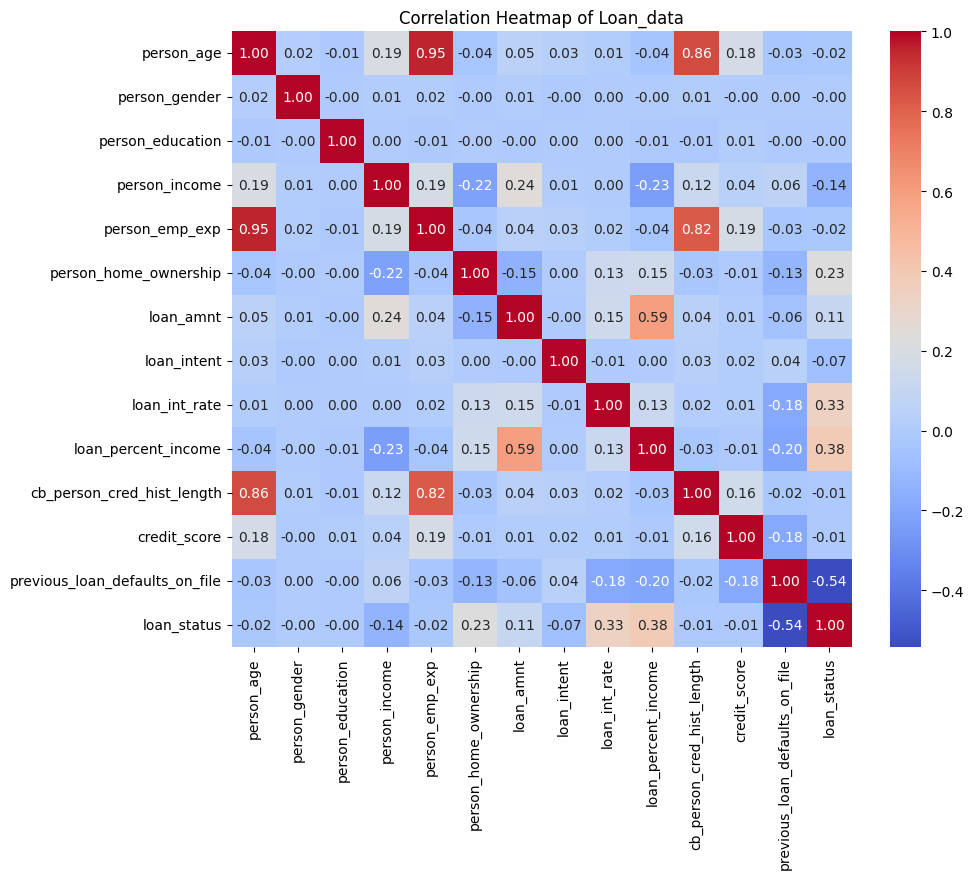

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(dfln.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Loan_data")
plt.show()

In [13]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(dfln)

In [14]:
x = dfln.drop('loan_status', axis=1)
y = dfln['loan_status']

In [15]:
newdfln=pd.DataFrame(x_scaled)
newdfln.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04,4.500000e+04
mean,-1.191343e-16,3.757982e-17,-5.936979e-17,-4.294836e-17,1.073709e-17,-4.547474e-17,1.263187e-17,-8.715991e-17,-2.779012e-16,-9.094947e-17,1.957940e-17,-9.627065e-16,-2.021099e-17,1.212660e-16
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-1.284388e+00,-1.110069e+00,-1.179025e+00,-8.992491e-01,-8.922841e-01,-1.177817e+00,-1.438388e+00,-1.461512e+00,-1.875471e+00,-1.602141e+00,-9.968632e-01,-4.810296e+00,-1.016040e+00,-5.345225e-01
25%,-6.226885e-01,-1.110069e+00,-1.179025e+00,-4.117681e-01,-7.273619e-01,-1.177817e+00,-7.257784e-01,-8.829042e-01,-8.112750e-01,-7.994934e-01,-7.391085e-01,-6.267188e-01,-1.016040e+00,-5.345225e-01
50%,-2.918388e-01,9.008448e-01,-5.029528e-01,-1.650185e-01,-2.325953e-01,9.048215e-01,-2.507052e-01,2.743116e-01,1.139469e-03,-2.261734e-01,-4.813539e-01,1.465490e-01,9.842135e-01,-5.345225e-01
75%,3.698606e-01,9.008448e-01,8.491920e-01,1.923637e-01,4.270935e-01,9.048215e-01,4.202961e-01,8.529195e-01,6.658422e-01,5.764745e-01,5.496646e-01,7.413704e-01,9.842135e-01,-5.345225e-01
max,1.922829e+01,9.008448e-01,1.525264e+00,8.853898e+01,1.972299e+01,9.048215e-01,4.024953e+00,1.431527e+00,3.019158e+00,5.965682e+00,6.220266e+00,4.310299e+00,9.842135e-01,1.870829e+00


In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [17]:
model=LogisticRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)

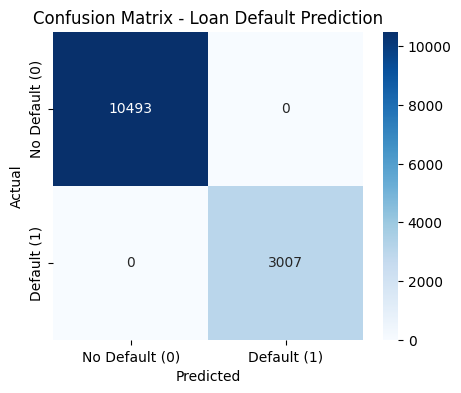

In [18]:
cm=confusion_matrix(ytest,pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['No Default (0)', 'Default (1)'],
            yticklabels=['No Default (0)', 'Default (1)'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Loan Default Prediction")
plt.show()


In [19]:
y_num=pd.factorize(y)[0]

In [20]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

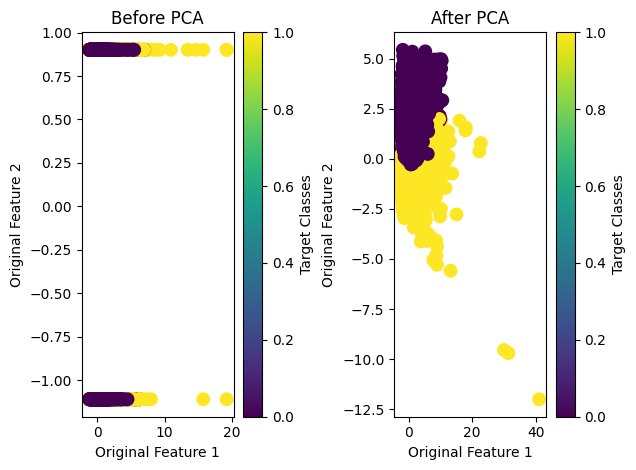

In [21]:
plt.subplot(1,2,1)
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=y_num,s=80)
plt.xlabel("Original Feature 1")
plt.ylabel("Original Feature 2")
plt.title("Before PCA")
plt.colorbar(label='Target Classes')

plt.subplot(1,2,2)
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_num,s=80)
plt.xlabel("Original Feature 1")
plt.ylabel("Original Feature 2")
plt.title("After PCA")
plt.colorbar(label='Target Classes')
plt.tight_layout()
plt.show()

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.3,random_state=42)

modelp=LogisticRegression()
modelp.fit(x_train,y_train)
pcaPred=modelp.predict(x_test)

In [23]:
num_col=dfln.select_dtypes(include=['int64','float64']).columns
cat_col=dfln.select_dtypes(include=['object']).columns

print("Numerical-",list(num_col))
print("Categorical-",list(cat_col))

Numerical- ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']
Categorical- []


### Encoding the col of categories

In [24]:
dfln_encoded=dfln.copy()
for col in cat_col:
    dfln_encoded[col]=dfln_encoded[col].astype('category').cat.codes

### Spliting feature and label

In [25]:
# output (target)

target_class='loan_status' if 'Loan_Status' in dfln_encoded.columns else dfln_encoded.columns[-1]
target_regr='ApplicationIncome' if 'ApplicationIncome' in dfln_encoded.columns else num_col[-1]

x_class=dfln_encoded.drop(columns=[target_class])#input of classification
y_class=dfln_encoded[target_class]#output of classification

x_regr=dfln_encoded.drop(columns=[target_regr])#input of regression
y_regr=dfln_encoded[target_regr]#output of regression


In [26]:
# data splitting of classification

xc_train,xc_test,yc_train,yc_test = train_test_split(x_class,y_class,test_size=0.2,random_state=42)

xr_train,xr_test,yr_train,yr_test = train_test_split(x_regr,y_regr,test_size=0.2,random_state=42)

### Decision Tree

i) Classification

In [27]:
dt_clf=DecisionTreeClassifier (random_state=42)
                              
dt_clf.fit(xc_train,yc_train)
                               
yc_pred_dt=dt_clf.predict(xc_test)

ii) Regression

In [28]:
dt_reg=DecisionTreeRegressor (random_state=42)

dt_reg.fit(xr_train,yr_train)

yr_pred_dt=dt_reg.predict(xr_test)

### Random Forest

i) Classification

In [29]:
rf_clf=RandomForestClassifier(random_state=42)
                             
rf_clf.fit(xc_train,yc_train)
                              
yc_pred_rf=rf_clf.predict(xc_test)

ii) Regression

In [33]:
rf_regr=RandomForestRegressor(random_state=42)

rf_regr.fit(xr_train,yr_train)

yr_pred_rf=rf_regr.predict(xr_test)

<b><u>Evaluations</b></u>

In [34]:
print("=====Classification Results=====")
print("\n DT Accuracy\n", accuracy_score(yc_test,yc_pred_dt))
print("\n RF Accuracy\n", accuracy_score(yc_test,yc_pred_rf))

print("\n DT Classification Report\n", classification_report(yc_test,yc_pred_dt))
print("\n RF Classification Report\n", classification_report(yc_test,yc_pred_rf))

=====Classification Results=====

 DT Accuracy
 0.8981111111111111

 RF Accuracy
 0.9286666666666666

 DT Classification Report
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.77      0.77      0.77      2010

    accuracy                           0.90      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg       0.90      0.90      0.90      9000


 RF Classification Report
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



### Visualization of Evaluation Metrics

C:\Users\acer\AppData\Local\Temp\ipykernel_9892\2020170066.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Decision Tree', 'Random Forest'],


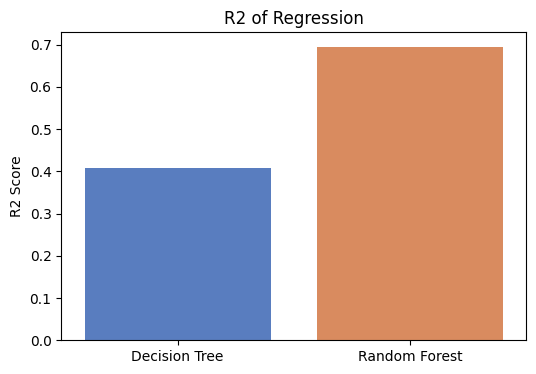

C:\Users\acer\AppData\Local\Temp\ipykernel_9892\2020170066.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Decision Tree', 'Random Forest'],


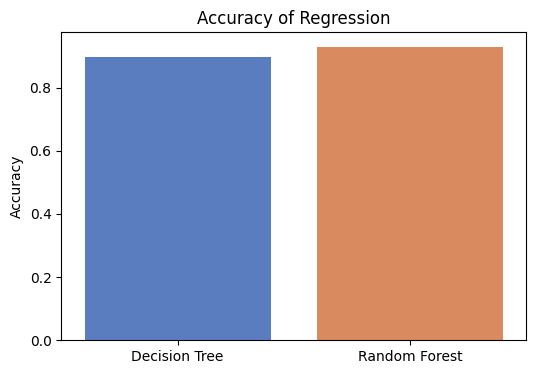

In [35]:
plt.figure(figsize=(6,4))
sns.barplot(x=['Decision Tree', 'Random Forest'],
y= [r2_score(yr_test, yr_pred_dt), r2_score(yr_test, yr_pred_rf)],
palette='muted')
plt.title("R2 of Regression")
plt.ylabel("R2 Score")
plt.show()
plt.figure(figsize=(6,4))
sns.barplot(x=['Decision Tree', 'Random Forest'],
y=[accuracy_score (yc_test, yc_pred_dt), accuracy_score(yc_test, yc_pred_rf)],
palette='muted')
plt.title("Accuracy of Regression")
plt.ylabel("Accuracy")
plt.show()